In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from itertools import permutations, product
from scipy.stats import norm

from scipy.integrate import odeint
from scipy import signal 

# Initial Values

In [2]:
path = 'Dataset'
Monte = np.load(path + '/Monte.npy')

# Loading Datasets

In [3]:
lorenz_dataframe = pd.read_csv( path + '/lorenz_dataframe.csv')
ARMA_dataframe = pd.read_csv( path + '/ARMA_dataframe.csv')
WhiteNoise_dataframe = pd.read_csv( path + '/WhiteNoise_dataframe.csv')
RandomWalk_dataframe = pd.read_csv( path + '/RandomWalk_dataframe.csv')
Chirp_dataframe = pd.read_csv( path + '/Chirp_dataframe.csv')
SineWave_dataframe = pd.read_csv( path + '/SineWave_dataframe.csv')

In [4]:
time = lorenz_dataframe.to_numpy()[:,0]
lorenz_time_series =(lorenz_dataframe.to_numpy()[:,1:]).T
ARMA_time_series = (ARMA_dataframe.to_numpy()[:,1:]).T
WhiteNoise_time_series = (WhiteNoise_dataframe.to_numpy()[:,1:]).T
RandomWalk_time_series = (RandomWalk_dataframe.to_numpy()[:,1:]).T
Chirp_time_series = (Chirp_dataframe.to_numpy()[:,1:]).T
SineWave_time_series = (SineWave_dataframe.to_numpy()[:,1:]).T

# Visual Inspection

In [5]:
obs_ls = np.random.randint(0, Monte, 3)

## 1) Lorenz System

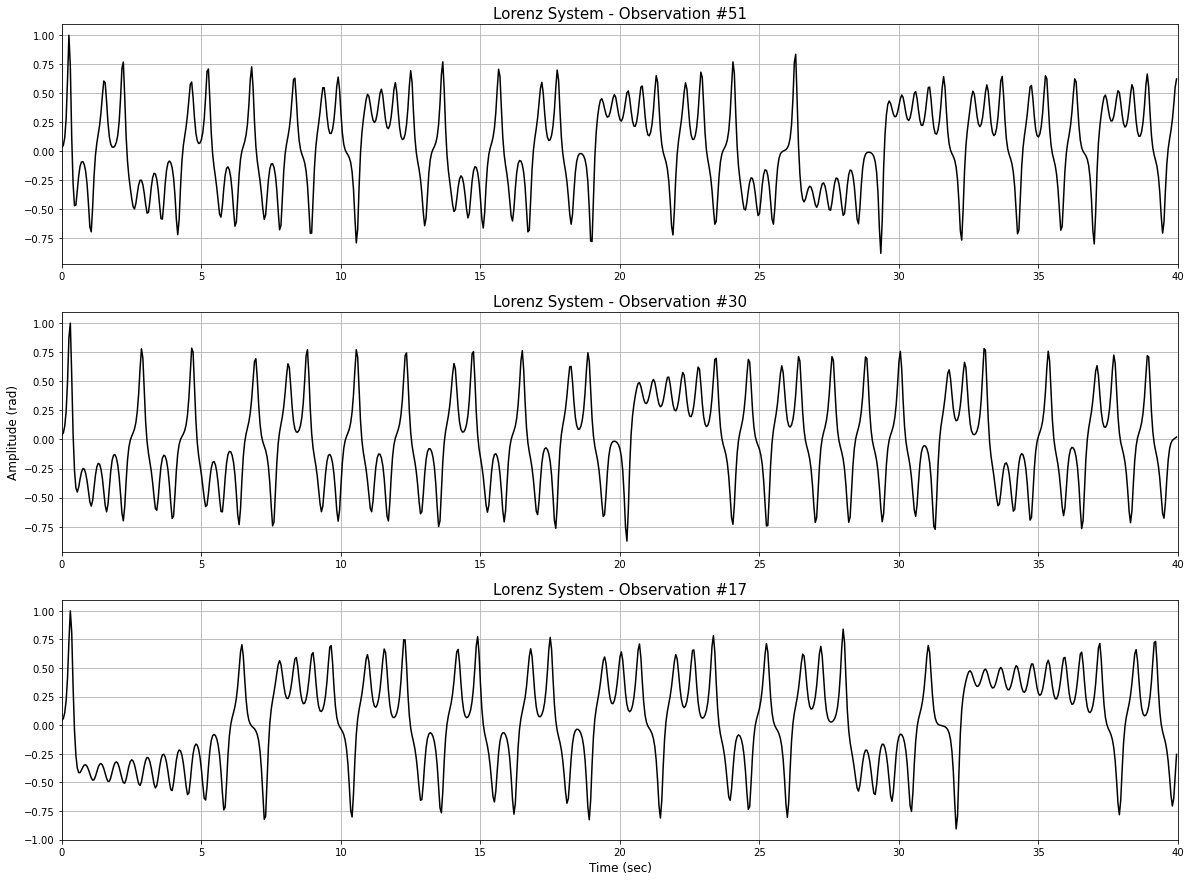

In [6]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
plt.plot(time,lorenz_time_series[obs_ls[0],:], c = 'black')
plt.title('Lorenz System - Observation #{}'.format(obs_ls[0] + 1), fontsize = 15)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,2)
plt.plot(time,lorenz_time_series[obs_ls[1],:], c = 'black')
plt.title('Lorenz System - Observation #{}'.format(obs_ls[1] + 1), fontsize = 15)
plt.ylabel('Amplitude (rad)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,3)
plt.plot(time,lorenz_time_series[obs_ls[2],:], c = 'black')
plt.title('Lorenz System - Observation #{}'.format(obs_ls[2] + 1), fontsize = 15)
plt.xlabel('Time (sec)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

## 2) ARMA

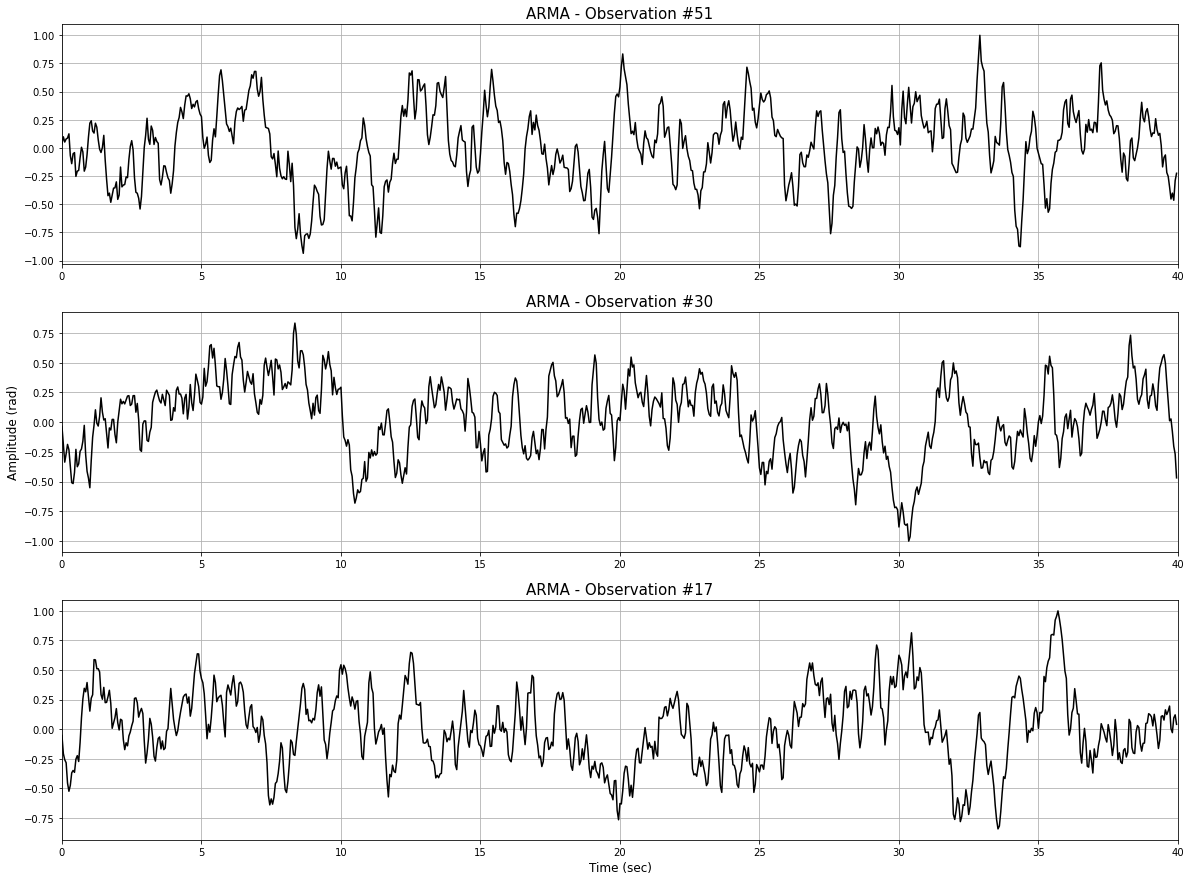

In [7]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
plt.plot(time,ARMA_time_series[obs_ls[0],:], c = 'black')
plt.title('ARMA - Observation #{}'.format(obs_ls[0] + 1), fontsize = 15)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,2)
plt.plot(time,ARMA_time_series[obs_ls[1],:], c = 'black')
plt.title('ARMA - Observation #{}'.format(obs_ls[1] + 1), fontsize = 15)
plt.ylabel('Amplitude (rad)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,3)
plt.plot(time,ARMA_time_series[obs_ls[2],:], c = 'black')
plt.title('ARMA - Observation #{}'.format(obs_ls[2] + 1), fontsize = 15)
plt.xlabel('Time (sec)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

## 3) White Noise

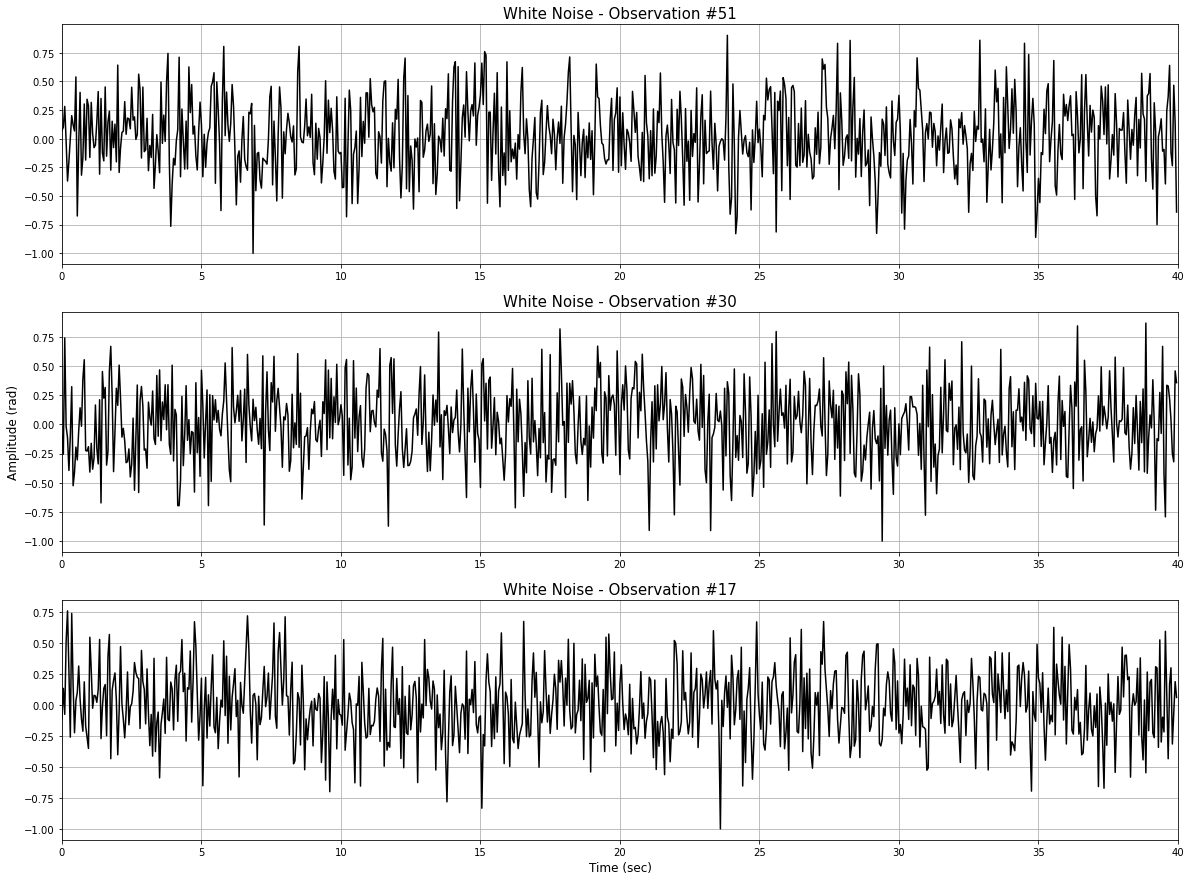

In [8]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
plt.plot(time,WhiteNoise_time_series[obs_ls[0],:], c = 'black')
plt.title('White Noise - Observation #{}'.format(obs_ls[0] + 1), fontsize = 15)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,2)
plt.plot(time,WhiteNoise_time_series[obs_ls[1],:], c = 'black')
plt.title('White Noise - Observation #{}'.format(obs_ls[1] + 1), fontsize = 15)
plt.ylabel('Amplitude (rad)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,3)
plt.plot(time,WhiteNoise_time_series[obs_ls[2],:], c = 'black')
plt.title('White Noise - Observation #{}'.format(obs_ls[2] + 1), fontsize = 15)
plt.xlabel('Time (sec)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

## 4) Random Walk

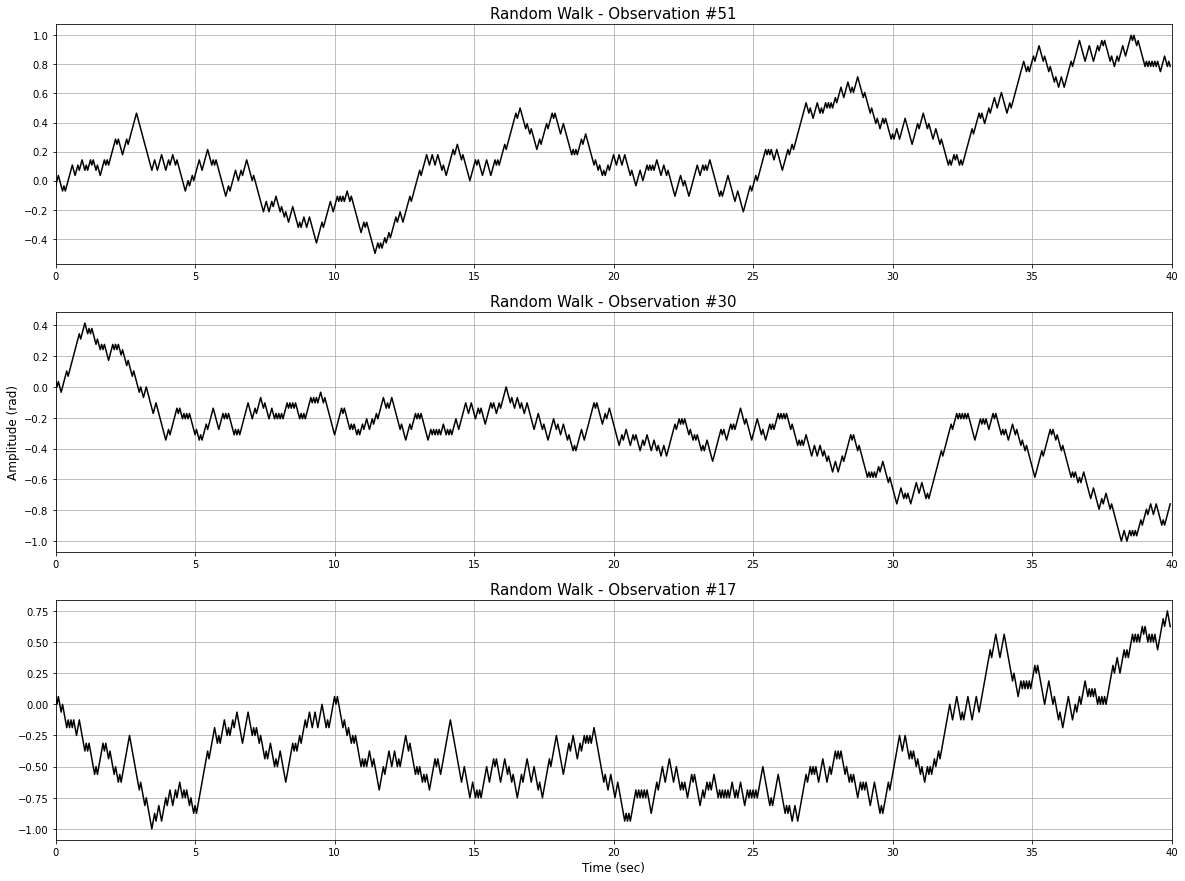

In [9]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
plt.plot(time, RandomWalk_time_series[obs_ls[0],:], c = 'black')
plt.title('Random Walk - Observation #{}'.format(obs_ls[0] + 1), fontsize = 15)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,2)
plt.plot(time, RandomWalk_time_series[obs_ls[1],:], c = 'black')
plt.title('Random Walk - Observation #{}'.format(obs_ls[1] + 1), fontsize = 15)
plt.ylabel('Amplitude (rad)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,3)
plt.plot(time, RandomWalk_time_series[obs_ls[2],:], c = 'black')
plt.title('Random Walk - Observation #{}'.format(obs_ls[2] + 1), fontsize = 15)
plt.xlabel('Time (sec)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

## 5) Chirp

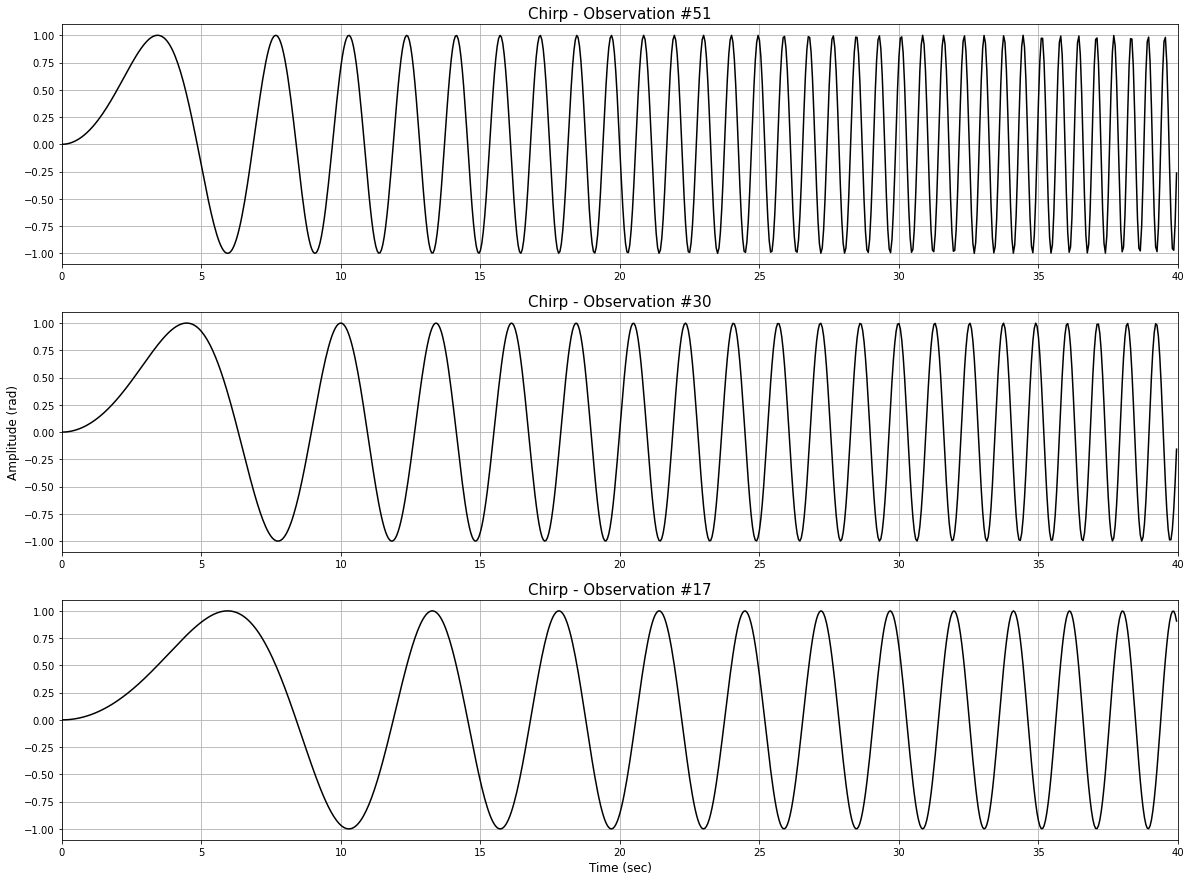

In [10]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
plt.plot(time, Chirp_time_series[obs_ls[0],:], c = 'black')
plt.title('Chirp - Observation #{}'.format(obs_ls[0] + 1), fontsize = 15)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,2)
plt.plot(time, Chirp_time_series[obs_ls[1],:], c = 'black')
plt.title('Chirp - Observation #{}'.format(obs_ls[1] + 1), fontsize = 15)
plt.ylabel('Amplitude (rad)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,3)
plt.plot(time, Chirp_time_series[obs_ls[2],:], c = 'black')
plt.title('Chirp - Observation #{}'.format(obs_ls[2] + 1), fontsize = 15)
plt.xlabel('Time (sec)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

# Chirp_time_series
# SineWave_time_series

## 6) Sine Wave 

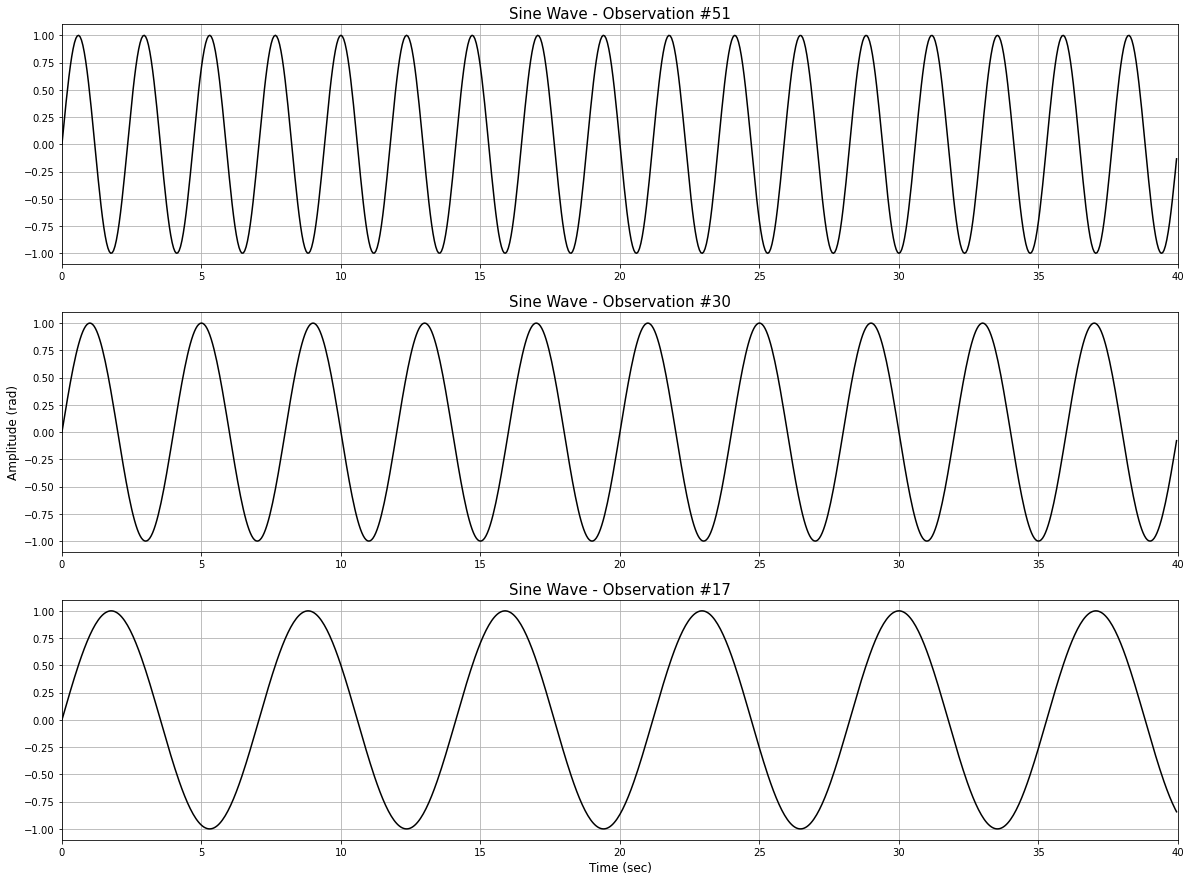

In [11]:
plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
plt.plot(time, SineWave_time_series[obs_ls[0],:], c = 'black')
plt.title('Sine Wave - Observation #{}'.format(obs_ls[0] + 1), fontsize = 15)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,2)
plt.plot(time, SineWave_time_series[obs_ls[1],:], c = 'black')
plt.title('Sine Wave - Observation #{}'.format(obs_ls[1] + 1), fontsize = 15)
plt.ylabel('Amplitude (rad)', fontsize = 12)
plt.xlim([0,40])
plt.grid()

plt.subplot(3,1,3)
plt.plot(time, SineWave_time_series[obs_ls[2],:], c = 'black')
plt.title('Sine Wave - Observation #{}'.format(obs_ls[2] + 1), fontsize = 15)
plt.xlabel('Time (sec)', fontsize = 12)
plt.xlim([0,40])
plt.grid()